# Lab 3 Agent Based Modeling

## Tanisha Payne
## June 2, 2019

### Exploring Cellular Automata

Write a program that will enact the rules for a 1-d Cellular Automata (CA). These are often plotted in two dimensions, with the 2nd dimension being time. The program should output a graph of the CA’s behavior over time. You are free to use any libraries to help with this task.

Choose at least 2 rule-sets (e.g. Rule 90 will generate things like Sierpinski triangles: https://en.wikipedia.org/wiki/Rule_90) and explore their behavior. For example, try different initial conditions or differnent widths for your CA and see how this changes what happens. Does it matter how you handle the edges? (e.g. do your right-most and left-most edges interact directly like a cylinder?)

See the lecture for Week 5 for the examples we discussed in class.

For the overall problem, write a paragraph or more about what you found challenging and/or what you learned while working on this problem.

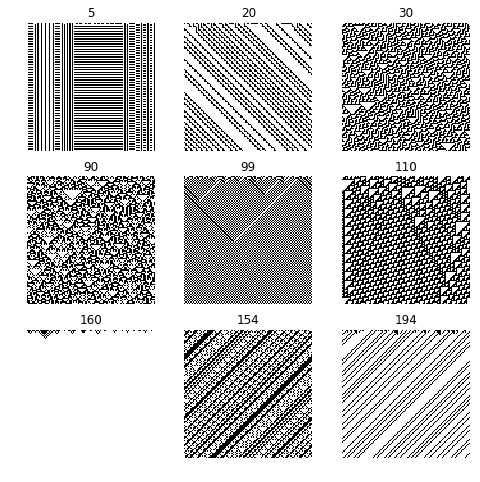

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#list for binary numbers
u = np.array([[4], [2], [1]])

def step(x, rule_b):
    """Compute a single stet of an elementary cellular
    automaton."""
    # The columns contains the L, C, R values
    # of all cells.
    y = np.vstack((np.roll(x, 1), x,
                   np.roll(x, -1))).astype(np.int8)
    # We get the LCR pattern numbers between 0 and 7.
    z = np.sum(y * u, axis=0).astype(np.int8)
    # We get the patterns given by the rule.
    return rule_b[7 - z]

def generate(rule, size=100, steps=100):
    """Simulate an elementary cellular automaton given
    its rule (number between 0 and 255)."""
    # Compute the binary representation of the rule.
    rule_b = np.array(
        [int(_) for _ in np.binary_repr(rule, 8)],
        dtype=np.int8)
    x = np.zeros((steps, size), dtype=np.int8)
    # Random initial state.
    x[0, :] = np.random.rand(size) < .5
    # Apply the step function iteratively.
    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_b)
    return x

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
rules = [5, 20, 30,
         90, 99, 110,
         160, 154, 194]
for ax, rule in zip(axes.flat, rules):
    x = generate(rule)
    ax.imshow(x, interpolation='none',
              cmap=plt.cm.binary)
    ax.set_axis_off()
    ax.set_title(str(rule))

### Schelling's Segregration Model

Implement an ABM of Schelling’s Segregation model. Explore different “moving thresholds” and plot different/interesting results.

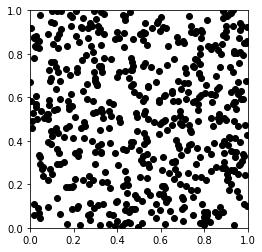

In [32]:
#import matplotlib
#matplotlib.use('TkAgg')
from pylab import *
import matplotlib.pyplot as plt
from matplotlib import animation

n = 1000 # number of agents
r = 0.1 # neighborhood radius
th = 0.5 # threshold for moving

class agent:
    pass

def initialize():
    global agents
    agents = []
    for i in range(n):
        ag = agent()
        ag.type = randint(2)
        ag.x = random()
        ag.y = random()
        agents.append(ag)
    
def observe():
    global agents
    cla()
    white = [ag for ag in agents if ag.type == 0]
    black = [ag for ag in agents if ag.type == 1]
    plot([ag.x for ag in white], [ag.y for ag in white], 'wo')
    plot([ag.x for ag in black], [ag.y for ag in black], 'ko')
    axis('image')
    axis([0, 1, 0, 1])

def update():
    global agents
    ag = agents[randint(n)]
    neighbors = [nb for nb in agents
                 if (ag.x - nb.x)**2 + (ag.y - nb.y)**2 < r**2 and nb != ag]
    if len(neighbors) > 0:
        q = len([nb for nb in neighbors if nb.type == ag.type]) \
            / float(len(neighbors))
        if q < th:
            ag.x, ag.y = random(), random()

#import pycxsimulator
#pycxsimulator.GUI().start(func=[initialize, observe, update])

initialize()
observe()
update()

### Forest Fire Model

Capture things like how long the fire continues to burn, what is the total area burned. 
Explore how changing the parameters (density of forestation, propensity to catch fire, etc.) of this model changes the behavior. 

In [29]:
%matplotlib inline

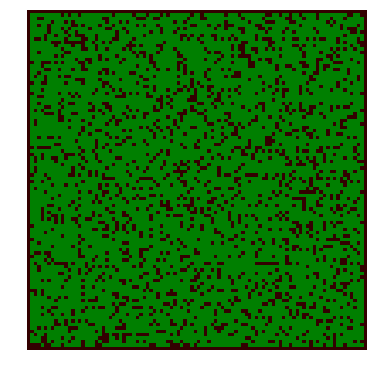

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors
from IPython.display import HTML

# Displacements from a cell to its eight nearest neighbours
neighbourhood = ((-1,-1), (-1,0), (-1,1), (0,-1), (0, 1), (1,-1), (1,0), (1,1))
EMPTY, TREE, FIRE = 0, 1, 2
# Colours for visualization: brown for EMPTY, dark green for TREE and orange
# for FIRE. Note that for the colormap to work, this list and the bounds list
# must be one larger than the number of different values in the array.
colors_list = [(0.2,0,0), (0,0.5,0), (1,0,0), 'orange']
cmap = colors.ListedColormap(colors_list)
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

def iterate(X):
    """Iterate the forest according to the forest-fire rules."""

    # The boundary of the forest is always empty, so only consider cells
    # indexed from 1 to nx-2, 1 to ny-2
    X1 = np.zeros((ny, nx))
    for ix in range(1,nx-1):
        for iy in range(1,ny-1):
            if X[iy,ix] == EMPTY and np.random.random() <= p:
                X1[iy,ix] = TREE
            if X[iy,ix] == TREE:
                X1[iy,ix] = TREE
                for dx,dy in neighbourhood:
                    if X[iy+dy,ix+dx] == FIRE:
                        X1[iy,ix] = FIRE
                        break
                else:
                    if np.random.random() <= f:
                        X1[iy,ix] = FIRE
    return X1

# The initial fraction of the forest occupied by trees.
forest_fraction = 0.2
# Probability of new tree growth per empty cell, and of lightning strike.
p, f = 0.05, 0.001
# Forest size (number of cells in x and y directions).
nx, ny = 100, 100

# Initialize the forest grid.
X  = np.zeros((ny, nx))
X[1:ny-1, 1:nx-1] = np.random.randint(0, 2, size=(ny-2, nx-2))
X[1:ny-1, 1:nx-1] = np.random.random(size=(ny-2, nx-2)) > forest_fraction

fig = plt.figure(figsize=(25/3, 6.25))
ax = fig.add_subplot(111)
ax.set_axis_off()
im = ax.imshow(X, cmap=cmap, norm=norm)#, interpolation='nearest')

# The animation function: called to produce a frame for each generation.
def animate(i):
    im.set_data(animate.X)
    animate.X = iterate(animate.X)
# Bind our grid to the identifier X in the animate function's namespace.
animate.X = X

# Interval between frames (ms).
interval = 100
anim = animation.FuncAnimation(fig, animate, interval=interval)
plt.show()
#HTML(anim.to_html5_video())
#print(X)